# 2D Stokes problem with periodic BC (from scratch)

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
N  = 2**8
k     = N*np.fft.fftfreq(N)
k1,k2 = np.meshgrid(k,k)
mu = 1.

# Source term f
x = np.linspace(-np.pi,np.pi,N+1)[:-1]
x1, x2 = np.meshgrid(x, x, sparse=False)

# Manufactured solution (validation)
a = 1.; c1 = 1.; c2 = 1.; #velocity coeffs
b = 1.; l1 = 1.; l2 = 1.; #pressure coeffs
um1  =        a*np.sin(c1*x1)*np.cos(c2*x2) # vel. x1-component
um2  = -a*c1/c2*np.cos(c1*x1)*np.sin(c2*x2) # vel. x2-component
pm   =        b*np.sin(l1*x1)*np.cos(l2*x2) # pressure
d1pm =  b*l1*np.cos(l1*x1)*np.cos(l2*x2)
d2pm = -b*l2*np.sin(l1*x1)*np.sin(l2*x2)
# forcing
# velocity
f1  =  (mu*(c1**2+c2**2)*um1+d1pm)
f2  =  (mu*(c1**2+c2**2)*um2+d2pm)
#f1 = np.sin(l1*x1)*np.cos(l2*x2)
#f2 = np.cos(l2*x2)*np.sin(l1*x1)


# pressure
f1p =  l1*b*np.cos(l1*x1)*np.cos(l2*x2)
f2p = -l2*b*np.sin(l1*x1)*np.sin(l2*x2)

# FT for forcing
#f1p_ = np.fft.fft2(f1p)
#f2p_ = np.fft.fft2(f2p)
f1_  = np.fft.fft2(f1)
f2_  = np.fft.fft2(f2)

kk = k1**2+k2**2; kk[0,0] = 1.;

p_ = np.zeros((N,N),dtype=complex)
#p_ = [-1j*k1_ for k1_ in k1]/kk*f1p_+[-1j*k2_ for k2_ in k2]/kk*f2p_
p_ = [-1j*k1_ for k1_ in k1]/kk*f1_+[-1j*k2_ for k2_ in k2]/kk*f2_
p_[0][0] = 0;
p = np.fft.ifft2(p_)

u_ = np.zeros((2,N,N),dtype=complex);
u_[0] = 1./mu/kk*(f1_ - [1j*k1_ for k1_ in k1]*p_)
u_[1] = 1./mu/kk*(f2_ - [1j*k2_ for k2_ in k2]*p_)
u_[0][0][0] = 0; u_[1][0][0] = 0
    
u1 = np.fft.ifft2(u_[0])
u2 = np.fft.ifft2(u_[1])

Text(0.5, 1.0, 'Stokes solution (or not) - pressure')

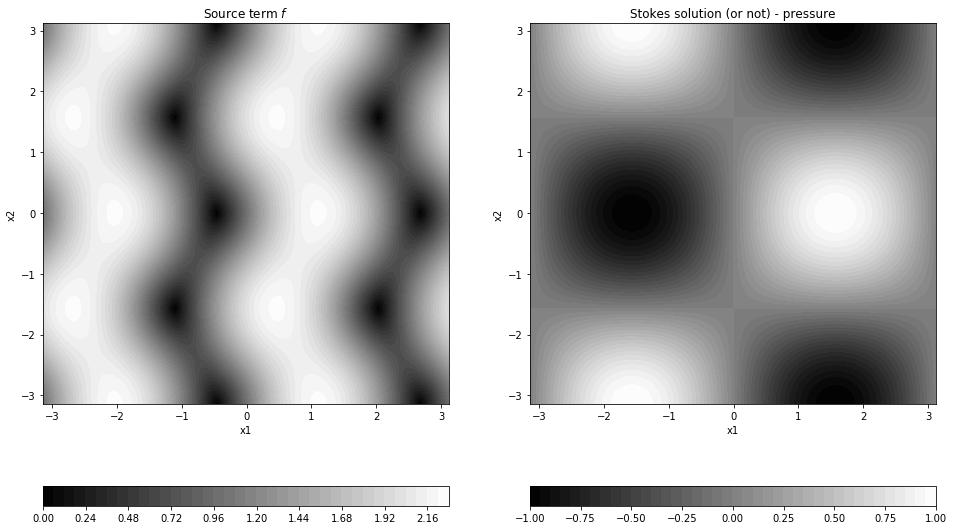

In [6]:
# Plotting for pressure
cmap = cm.gray; size = 8
fig, ax = plt.subplots(1,2,figsize=(2*size,size+2));
# forcing
im=ax[0].contourf(x,x,(f1.real**2+f2.real**2)**0.5,40,cmap=cm.get_cmap(cmap,20))
fig.colorbar(im,ax=ax[0],orientation="horizontal")
ax[0].set_xlabel('x1'); ax[0].set_ylabel('x2'); ax[0].set_title('Source term $f$')
# pressure
im=ax[1].contourf(x,x,p.real-pm,40, cmap=cm.get_cmap(cmap,))
fig.colorbar(im,ax=ax[1],orientation="horizontal")
ax[1].set_xlabel('x1'); ax[1].set_ylabel('x2'); ax[1].set_title('Stokes solution (or not) - pressure')

Text(0.5, 1.0, 'Stokes solution (or not)')

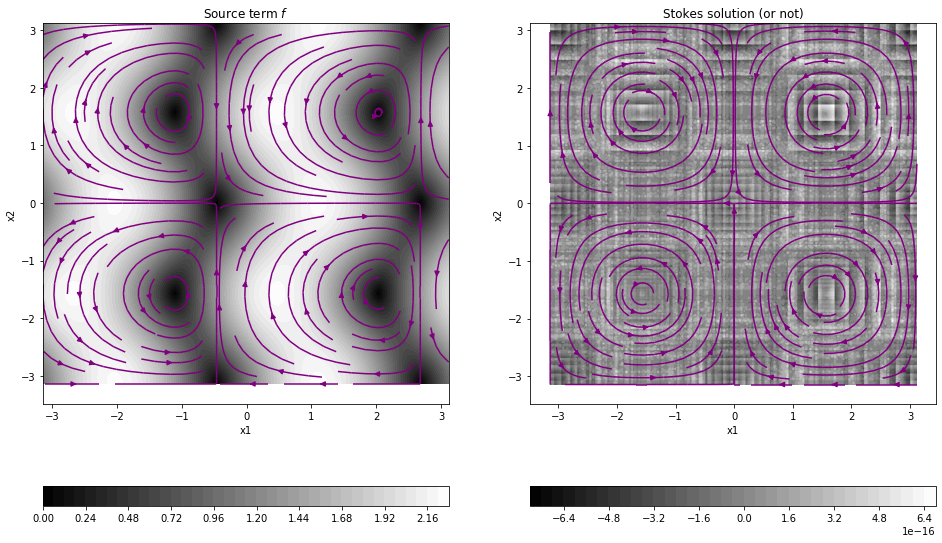

In [5]:
# Plotting for velocity
#norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
cmap = cm.gray; size = 8
fig, ax = plt.subplots(1,2,figsize=(2*size,size+2));
im=ax[0].contourf(x,x,(f1.real**2+f2.real**2)**0.5,40,cmap=cm.get_cmap(cmap,20))
fig.colorbar(im,ax=ax[0],orientation="horizontal")
ax[0].streamplot(x,x,f1.real,f2.real,color='purple')
ax[0].set_xlabel('x1'); ax[0].set_ylabel('x2'); ax[0].set_title('Source term $f$')

im=ax[1].contourf(x,x,(u1.real**2+u2.real**2)**0.5-(um1.real**2+um2.real**2)**0.5,40, cmap=cm.get_cmap(cmap,))
#im=ax[1].contourf(x,x,(u1.real**2+u2.real**2)**0.5,40, cmap=cm.get_cmap(cmap,))
#ax[1].streamplot(x,x,u1.real-um1.real,u2.real-um2.real,color='purple')
ax[1].streamplot(x,x,u1.real,u2.real,color='purple',density=1.2)
fig.colorbar(im,ax=ax[1],orientation="horizontal")
ax[1].set_xlabel('x1'); ax[1].set_ylabel('x2'); ax[1].set_title('Stokes solution (or not)')

In [ ]:
print(np.array([-1j*k1_ for k1_ in k1]).shape)